<a href="https://colab.research.google.com/github/magoo34/AD-Attack-Defense/blob/master/Unsupervised_Wisdom_Explore_Medical_Narratives_on_Older_Adult_Falls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
import shutil
import os
from google.colab import files

# Mount your Google Drive account to your Colab notebook.
drive.mount('/content/drive')

# Create a folder to store the dataset.
os.makedirs('/content/drive/My Drive/Datasets', exist_ok=True)

# Use the interactive file uploader
uploaded = files.upload()

# Move the uploaded file to the desired folder
if 'primary_data.csv' in uploaded:
    uploaded_file_path = 'primary_data.csv'
    destination_path = os.path.join(dataset_folder, 'primary_data.csv')

    # Copy the file instead of moving it
    shutil.copy(uploaded_file_path, destination_path)
    print("File copied successfully!")
else:
    print("File not found.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving primary_data.csv to primary_data.csv


NameError: ignored

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding, LSTM, Dense
from keras.models import Sequential
import random
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
# Load the data
df = pd.read_csv('primary_data.csv')



In [31]:
# Check the data types
df.dtypes

cpsc_case_number       int64
narrative             object
treatment_date        object
age                    int64
sex                    int64
race                   int64
other_race            object
hispanic               int64
diagnosis              int64
other_diagnosis       object
diagnosis_2          float64
other_diagnosis_2     object
body_part              int64
body_part_2          float64
disposition            int64
location               int64
fire_involvement       int64
alcohol                int64
drug                   int64
product_1              int64
product_2              int64
product_3              int64
risk_factor           object
injury                object
dtype: object

In [32]:
#First Five Columns
df.head()

,cpsc_case_number,narrative,treatment_date,age,sex,race,other_race,hispanic,diagnosis,other_diagnosis,...,disposition,location,fire_involvement,alcohol,drug,product_1,product_2,product_3,risk_factor,injury
0,190103269,94YOM FELL TO THE FLOOR AT THE NURSING HOME ON...,2019-01-01,94,1,0,NaN,0,62,NaN,...,4,5,0,0,0,1807,0,0,Low,HEAD SUSTAINED A SUBDURAL HEMATOMA
1,190103270,86YOM FELL IN THE SHOWER AT HOME AND SUSTAINED...,2019-01-01,86,1,0,NaN,0,62,NaN,...,4,1,0,0,0,611,0,0,Medium,SUSTAINED A CLOSED HEAD INJURY
2,190103273,87YOF WAS GETTING UP FROM THE COUCH AND FELL T...,2019-01-01,87,2,0,NaN,0,53,NaN,...,4,1,0,0,0,679,1807,0,High,ELBOWS ADMITTED FOR HEMORRHAGIC STROKE
3,190103291,67YOF WAS AT A FRIENDS HOUSE AND SLIPPED ON WA...,2019-01-01,67,2,0,NaN,0,57,NaN,...,1,1,0,0,0,1807,0,0,Low,SUSTAINED A RIGHT RADIUS FX
4,190103294,70YOF WAS STANDING ON A STEP STOOL AND FELL OF...,2019-01-01,70,2,0,NaN,0,57,NaN,...,1,1,0,0,0,620,0,0,Medium,SUSTAINED A RIGHT RADIUS FX


In [33]:
#Last columns
df.tail()

,cpsc_case_number,narrative,treatment_date,age,sex,race,other_race,hispanic,diagnosis,other_diagnosis,...,disposition,location,fire_involvement,alcohol,drug,product_1,product_2,product_3,risk_factor,injury
115123,230217170,81 YOM FELL OUT OF BED. DX: LEFT FEMUR FRACTURE.,2022-10-22,81,1,1,NaN,2,57,NaN,...,4,1,0,0,0,4076,0,0,Medium,BED. DX: LEFT FEMUR FRACTURE.
115124,230217171,"72 YOF SLIPPED AND FELL ON THE FLOOR. DX: L-3,...",2022-10-22,72,2,1,NaN,2,57,NaN,...,4,0,0,0,0,1807,0,0,High,RIGHT RIB FRACTURES X 3.
115125,230217174,90 YOF TRIPPED AND FELL ON A GARAGE FLOOR. DX:...,2022-10-22,90,2,1,NaN,2,64,NaN,...,1,1,0,0,0,1807,0,0,Low,FLOOR. DX: LEFT SHOULDER STRAIN.
115126,230218390,77 YOM PRESENTS FROM NURSING HOME FOLLOWING UN...,2022-10-24,77,1,1,NaN,2,62,NaN,...,1,5,0,0,0,1807,0,0,Medium,"HEA D INJURY, SCALP LACERATION"
115127,230222638,71 YOF PRESENTS WITH ANKLE INJURY. PT STATES ...,2022-10-24,71,2,1,NaN,2,64,NaN,...,1,0,0,0,0,4074,0,0,High,AND FELL. DX: ANKLE SPRAIN


In [28]:
# Check the column names
print(df.columns)

Index(['cpsc_case_number', 'narrative', 'treatment_date', 'age', 'sex', 'race',
       'other_race', 'hispanic', 'diagnosis', 'other_diagnosis', 'diagnosis_2',
       'other_diagnosis_2', 'body_part', 'body_part_2', 'disposition',
       'location', 'fire_involvement', 'alcohol', 'drug', 'product_1',
       'product_2', 'product_3', 'risk_factor', 'injury'],
      dtype='object')


In [11]:
# Verify the data type of the 'age' column
print(df['age'].dtype)


int64


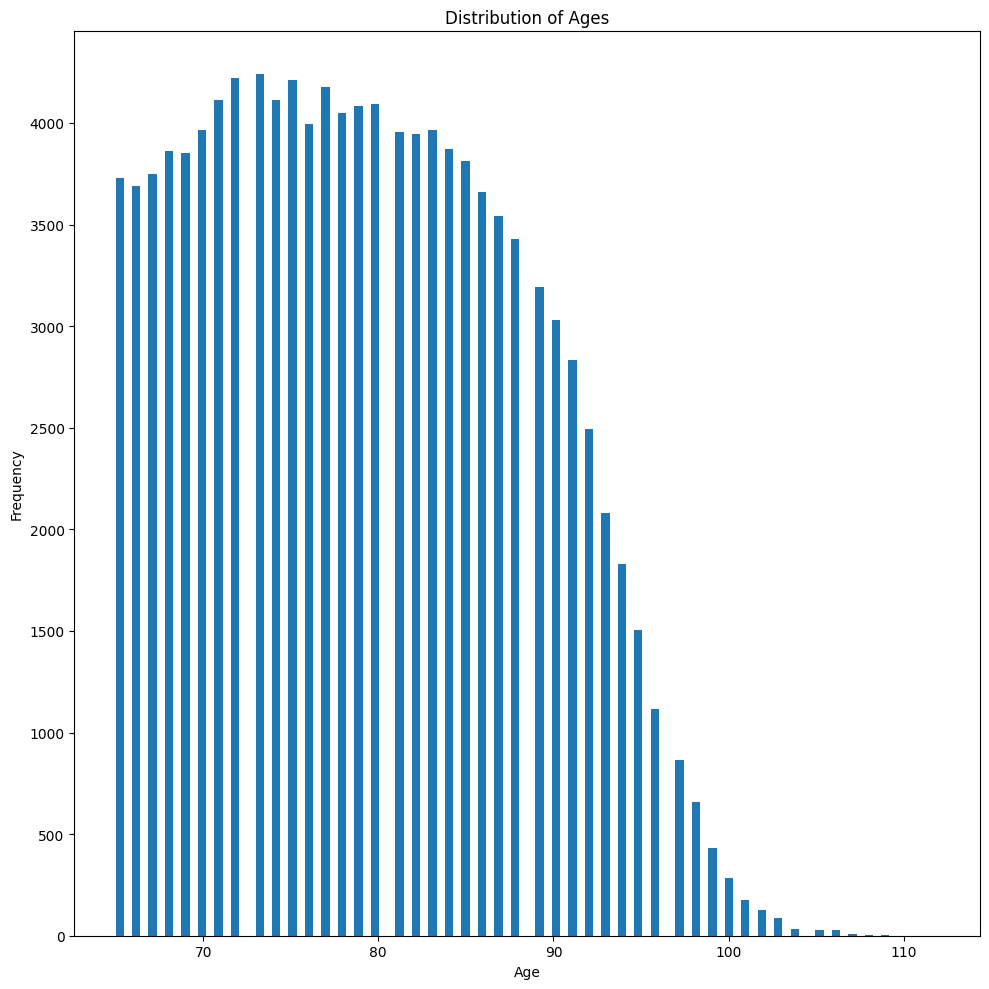

In [12]:
# Explorer the distribution of ages

# Create a histogram
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(df['age'], bins=100)  # Pass 'ax' directly here
ax.set_title('Distribution of Ages')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

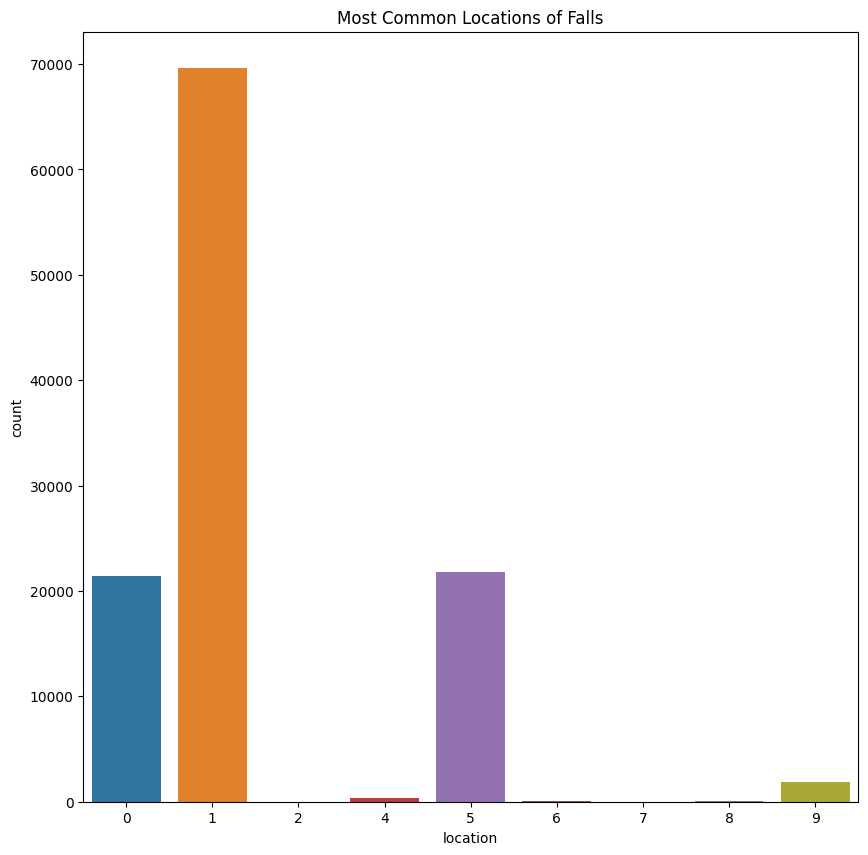

In [13]:
# Explore the most common locations of falls
plt.subplots(figsize=(10, 10))
sns.countplot(data=df, x='location')
plt.title('Most Common Locations of Falls')
plt.show()

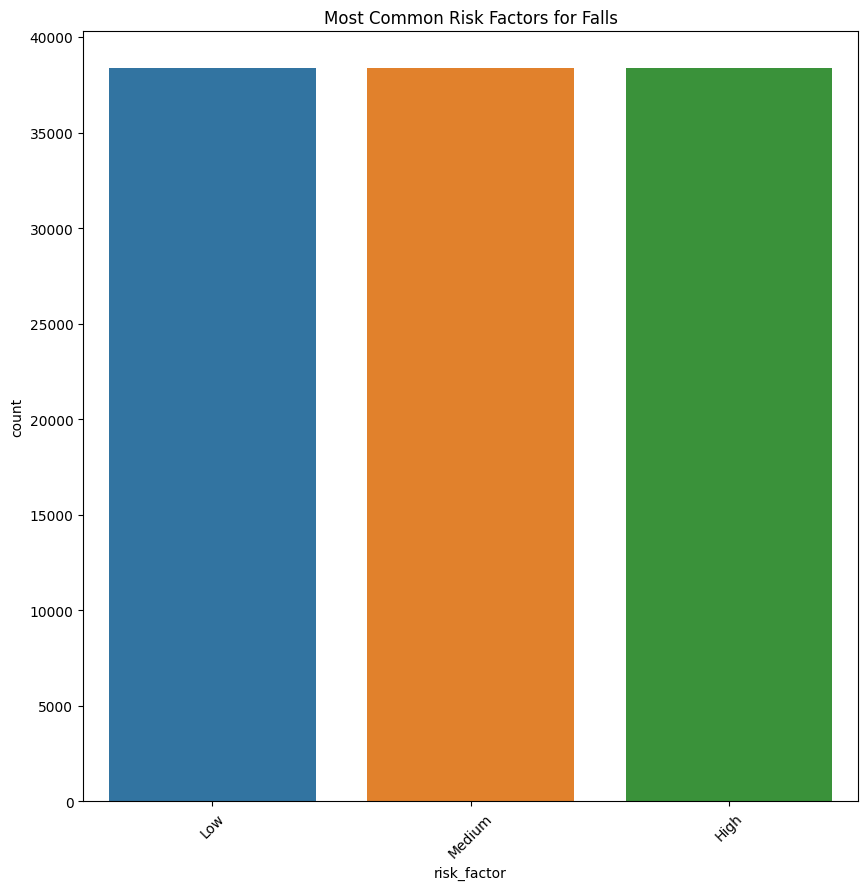

In [14]:
# Explore the most common risk factors for falls

# Create a new column 'risk_factor' with some sample data
df['risk_factor'] = ['Low', 'Medium', 'High'] * (len(df) // 3)

# Plot the countplot
plt.subplots(figsize=(10, 10))
sns.countplot(data=df, x='risk_factor')
plt.title('Most Common Risk Factors for Falls')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Get the most common injury from Falls
# Create a new column called 'injury'
#df['injury'] = df['narrative'].str.split().str.get(-1)
df['injury'] = df['narrative'].apply(lambda x: ' '.join(str(x).split()[-5:]))

# Update the DataFrame in place
#df.update(df[['injury']], inplace=True)

# Write the DataFrame to the same CSV file
df.to_csv('primary_data.csv', index=False)

# Get the number of times a certain injury occurs from falls
fall_injuries = df[df['injury'].str.contains('fall')]
fall_injury_counts = fall_injuries['injury'].value_counts()

# Print the number of times each fall injury occurs
print(fall_injury_counts)

#df = pd.DataFrame({'primary_cause_of_injury': ['Fall from ladder; Hit by object; Fall on slippery surface']})

#def g(df):
   # df['injury'] = df['primary_cause_of_injury'].replace('Fall from ladder; Hit by object; Fall on slippery surface', 'Fall from ladder')
   # return df

#df = g(df.copy())

#print(df)


In [16]:
# Explore the most common injuries from falls
#df['injury'] = df['primary_cause_of_injury'].apply(lambda x: str(x).split(';')[0])

# Check the column names in your DataFrame
print(df.columns)

# Drop rows with missing values
#df = df.dropna()

# Get the most common injuries from falls
#most_common_injuries = df['injury'].value_counts().head()

# Plot a bar chart of the most common injuries
#plt.figure(figsize=(10, 10))
#sns.barplot(x=most_common_injuries.index, y=most_common_injuries.values)
#plt.title('Most Common Injuries from Falls')
#plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
#plt.show()

Index(['cpsc_case_number', 'narrative', 'treatment_date', 'age', 'sex', 'race',
       'other_race', 'hispanic', 'diagnosis', 'other_diagnosis', 'diagnosis_2',
       'other_diagnosis_2', 'body_part', 'body_part_2', 'disposition',
       'location', 'fire_involvement', 'alcohol', 'drug', 'product_1',
       'product_2', 'product_3', 'risk_factor', 'injury'],
      dtype='object')


In [25]:
# Set the random seed for reproducibility
np.random.seed(1)

In [26]:
# Load Medical narratives
narratives = pd.read_csv("primary_data.csv")


In [27]:
# Process the medical narratives
def preprocess_narratives(narratives):
  """Preprocess a medical narratives for text analysis"""
  narrative = narrative.lower()
  narrative = narrative.replace("\n"," ")
  narrative = narrative.replace(","," ")
  narrative = narrative.replace("."," ")
  return narrative
  narratives["narrative"] = narratives["narrative"].apply("preprocess_narrative")

In [28]:
#Split the medical narratives into training and test sets.

train_narratives,test_narratives = train_test_split(
    narratives,test_size = 0.2,random_state = 1
)

In [29]:
# Tokenize the medical narratives.

tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(train_narratives["narrative"])

In [30]:
# Create training and test data for the LSTM model.

# Create a column 'fall' with binary labels indicating whether 'narrative' contains 'fall'
train_narratives['fall'] = train_narratives['narrative'].str.contains('fall')
test_narratives['fall'] = test_narratives['narrative'].str.contains('fall')

# Convert narratives to sequences using tokenizer
train_data = tokenizer.texts_to_sequences(train_narratives["narrative"])
test_data = tokenizer.texts_to_sequences(test_narratives["narrative"])

# Extract labels
train_labels = train_narratives['fall'].astype(int)
test_labels = test_narratives['fall'].astype(int)




In [31]:
# Create an LSTM model for fall prdiction
# Define the number of time steps and features
time_steps = 10.0
features = 0.0

# Create the LSTM model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128))
model.add(LSTM(units=128, input_shape=(time_steps, features)))
model.add(Dense(units=1, activation="softmax"))

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,411,713
Trainable params: 1,411,713
Non-trainable params: 0
_________________________________________________________________


In [34]:
#Train the LSTM Model.
train_data = np.array(train_data)
train_labels = np.array(train_labels)

# Train the model
#model.fit(np.array([train_data]), np.array([train_labels]), epochs=10, batch_size=32)


<ipython-input-34-014274355669>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_data = np.array(train_data)


In [34]:

def explore_unsupervised_learning_methods(narratives):
    """Explores the application of unsupervised machine learning methods on ED visit narratives about older (age 65+) adult falls."""

    # Create a TF-IDF vectorizer
    vectorizer = TfidfVectorizer(stop_words="english")

    # Fit the vectorizer to the narratives
    vectorized_narratives = vectorizer.fit_transform(narratives)

    # Apply k-means clustering to the vectorized narratives
    kmeans = KMeans(n_clusters=5)
    kmeans.fit(vectorized_narratives)

    # Print the cluster labels for each narrative
    for i, narrative in enumerate(narratives):
        print(f"Narrative {i}: {narrative}")
        print(f"Cluster label: {kmeans.labels_[i]}")


if __name__ == "__main__":
    # Load the narratives
    narratives = pd.read_csv("primary_data.csv")["narrative"].tolist()

    # Explore the unsupervised learning methods
    explore_unsupervised_learning_methods(narratives)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Streaming output truncated to the last 5000 lines.
Narrative 112628: 66YOM, HX LEUKEMIA, HAD SYNCOPE WHILE EXITING BATHROOM WITH WALKER. CAUGHT BY WIFE. A FEW DAYS AGO PT FELL AND STRUCK HEAD WHEN WALKER CAUGHT ON CORNER OF WALL AND FLOOR INTERSECTION. PT CURRENTLY ON CHEMOTHERAPY. DX:SYNCOPE, PANCYTOPENIA, LEUKOPENIA, ANEMIA, SEVERE THROMBOCYTOPENIA. ADMIT.
Cluster label: 2
Narrative 112629: 75YOM, ON ***, HAD A SYNCOPAL EVENT AND  FELL FORWARD HITTING HEAD/FACE ON BATHROOM CABINET AND FLOOR. C/O HEAD AND FACE PAIN. ECCHYMOSIS TO LEFT ORBIT. HAD A CARDIAC ARREST AT OTHER HOSPITIAL 2 WEEKS AGO. DX:RIB FX, ORBITAL FLOOR FX, SYNCOPE JAUNDICE. ADMIT.
Cluster label: 2
Narrative 112630: 67YOF HAD UNWITNESS FALL TO FLOOR AT PT'S CARE FACILITY. DX: AMS, HEMATOMA OF FACE, SCALP HEMATOMA, CHF, ESRD, PLEURAL EFFUSION, ASCITES. ADMIT.
Cluster label: 2
Narrative 112631: 78YOF FOUND DOWN S/P MULTIPLE FALLS. FELL AT LEAST ONCE LAST NIGHT AND AGAIN THIS MORNING. FOUND ON FLOOR. EYE SWELLING AND LACER